# 泰坦尼克号生死预测

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## 数据探索

In [2]:
train = pd.read_csv(r'./datasets/titanic/train.csv')
test = pd.read_csv(r'./datasets/titanic/test.csv')

display(train.columns, test.columns)
display(train.shape, test.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

(891, 12)

(418, 11)

In [3]:
display(train.head(), test.head())

#数据融合分析
mixdata = pd.concat([train, test], ignore_index = True)

display(mixdata.describe(), mixdata.info())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


None

### 各特征与存活率的关系 

#### 查看Embarked 各等级对存活率的影响

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_17252\348796874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Survival Rate by Embarked')

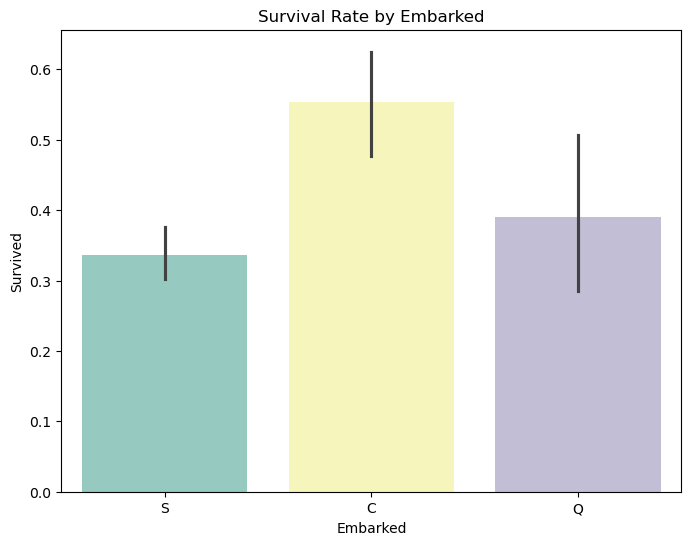

In [4]:

fig, ax = plt.subplots(figsize = (8, 6)) 

sns.barplot(
    data = train,
    x = "Embarked",
    y = "Survived",
    palette = 'Set3',
    ax = ax
)
ax.set_title("Survival Rate by Embarked")

#### 查看各个港口embaeked不同pclass的存活情况

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_17252\146874686.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


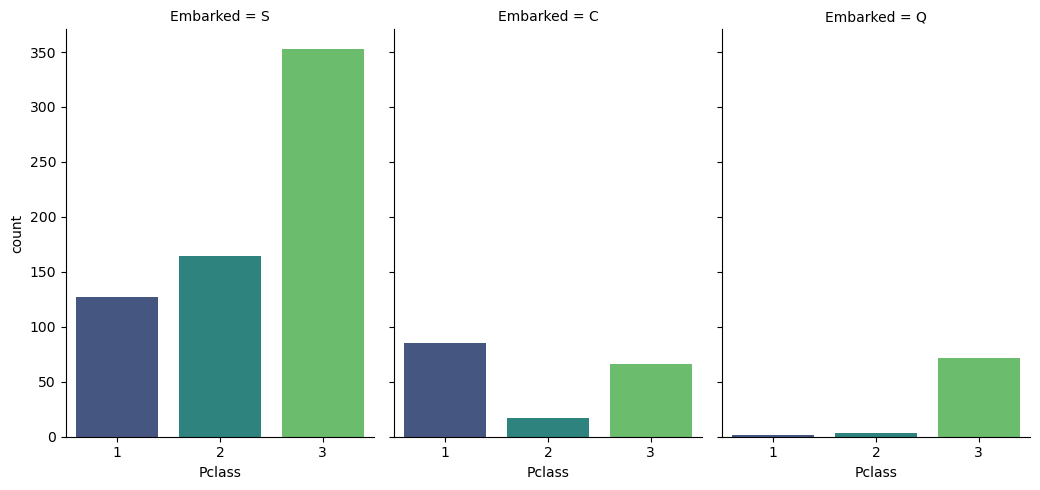

In [5]:

sns.catplot(
    data = train,
    x = 'Pclass',
    col = 'Embarked',
    kind = 'count',
    aspect = 0.7,
    palette = 'viridis'
)


#### parch家庭人数对存活的影响

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_17252\1550036609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Survival Rate by Parch')

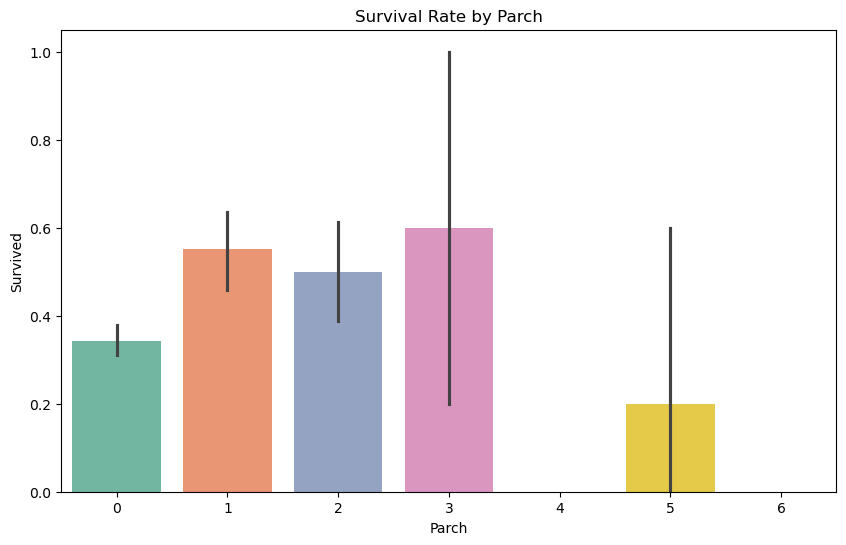

In [6]:
fig = plt.figure(figsize = (10, 6))

sns.barplot(
    data = train,
    x = 'Parch',
    y = 'Survived',
    palette = 'Set2',
)
plt.title('Survival Rate by Parch')

#### fare花费对存活的影响

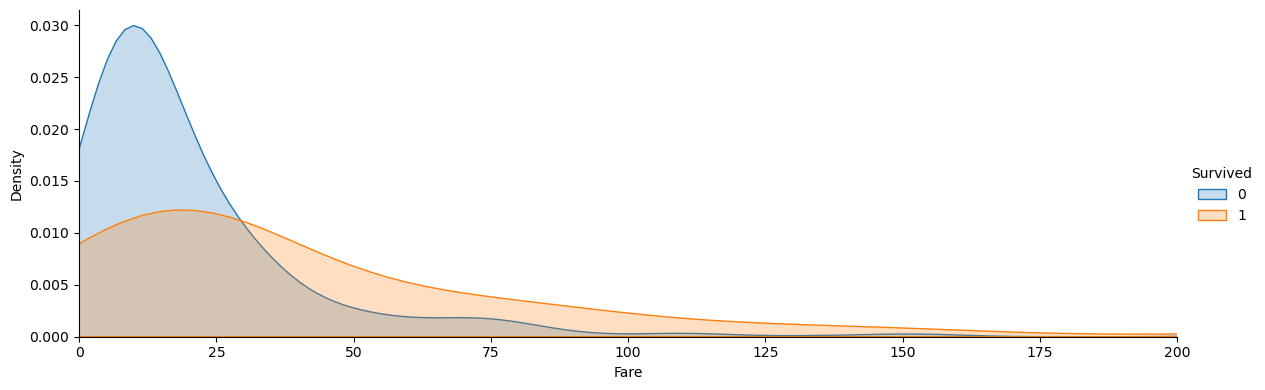

In [7]:
axisgrid = sns.FacetGrid(
    train, 
    hue = 'Survived',
    aspect = 3,
    height = 4
)
axisgrid.map(sns.kdeplot, 'Fare', fill = True)
axisgrid.set(xlim = (0, 200))
axisgrid.add_legend()

((array([-3.27421028, -3.01474991, -2.87032217, ...,  2.87032217,
          3.01474991,  3.27421028]),
  array([  0.    ,   0.    ,   0.    , ..., 512.3292, 512.3292, 512.3292])),
 (37.60780762452688, 33.29547928134558, 0.7252815375732209))

<Figure size 1000x600 with 0 Axes>

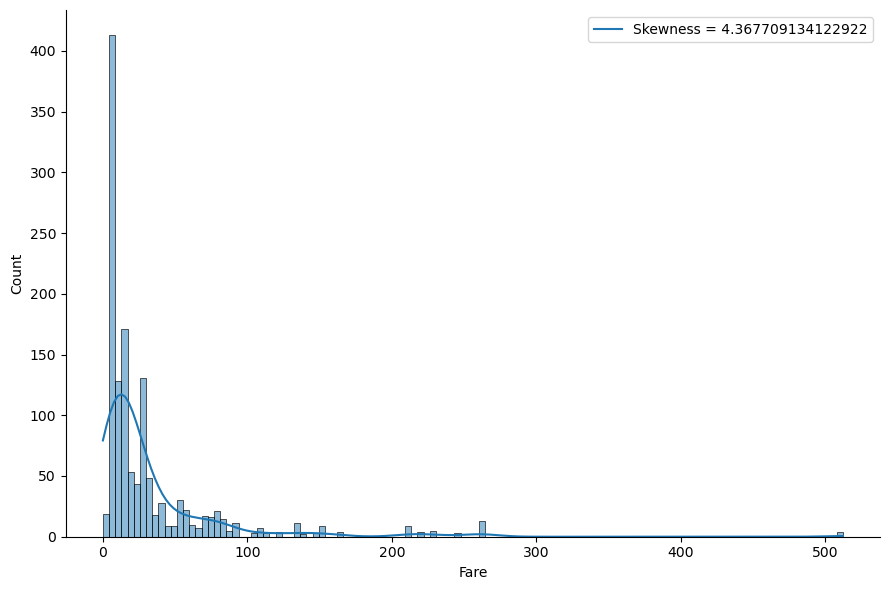

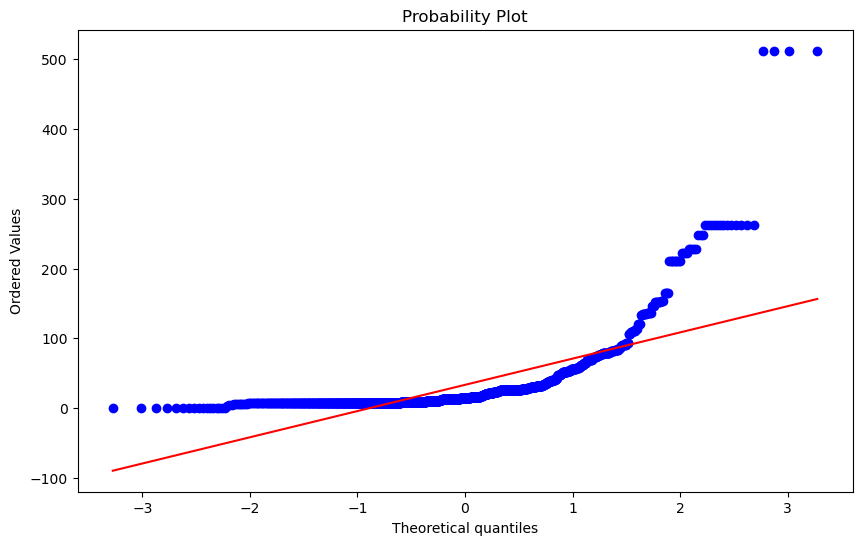

In [8]:
#查看票价的分布

fig = plt.figure(figsize = (10, 6))

sns.displot(
    mixdata['Fare'][mixdata['Fare'].notnull()],
    kde = True,
    kind = 'hist',
    height = 6,
    aspect = 1.5
)

plt.legend(labels = [f"Skewness = {mixdata['Fare'].skew()}"])

fig = plt.figure(figsize = (10, 6))

stats.probplot(
    mixdata['Fare'][mixdata['Fare'].notnull()],
    dist = 'norm',
    plot = plt
)

((array([-3.27051298, -3.01078069, -2.86618463, ...,  2.86618463,
          3.01078069,  3.27051298]),
  array([0.14322024, 0.32888243, 0.475885  , ..., 1.83081469, 1.83081469,
         1.83081469])),
 (0.2918565067537078, 1.0337216439032109, 0.9607042147798567))

<Figure size 1000x600 with 0 Axes>

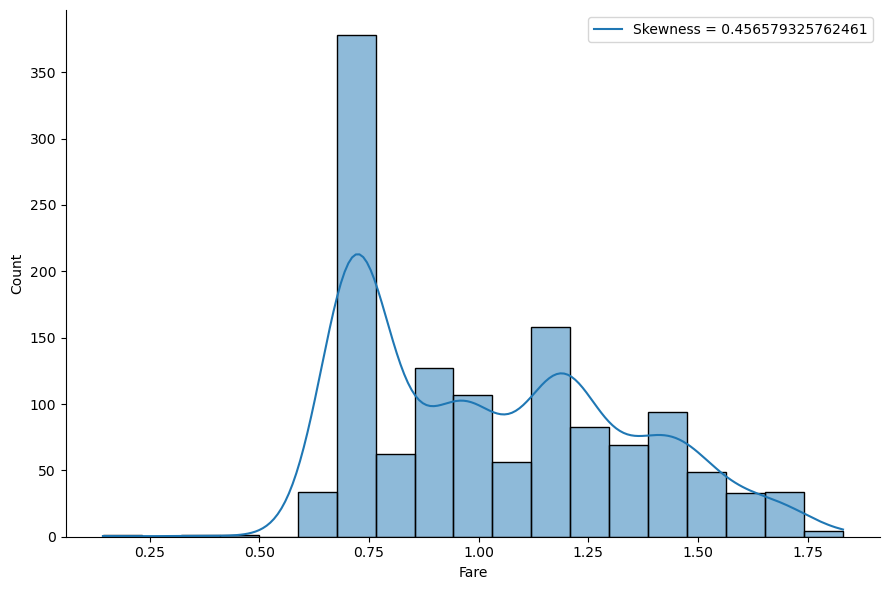

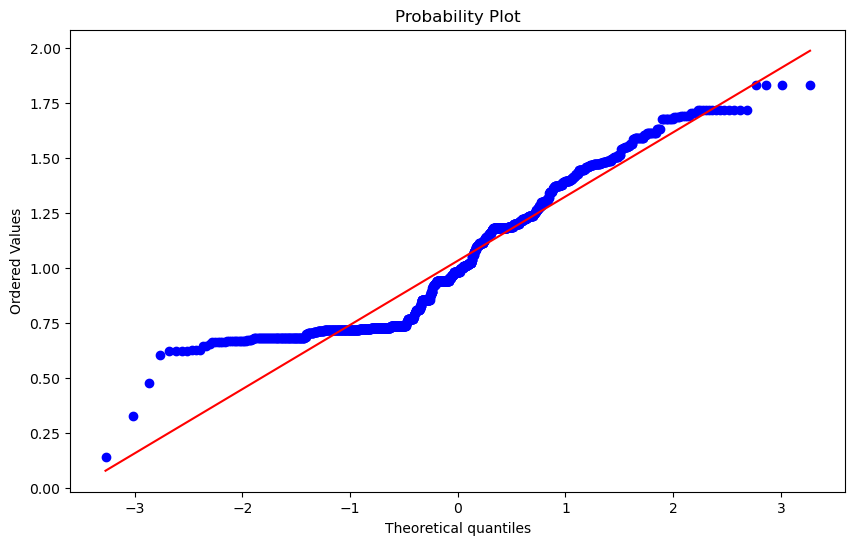

In [10]:
#数据偏左, 广义幂转化
# mixdata['Fare'] = mixdata['Fare'].map(lambda x: np.log(x) if x > 0 else x) #对数化处理
mixdata['Fare'] = mixdata['Fare'].transform(np.log)

fig = plt.figure(figsize = (10, 6))

sns.displot(
    mixdata['Fare'][mixdata['Fare'].notnull()],
    kde = True,
    kind = 'hist',
    height = 6,
    aspect = 1.5
)

plt.legend(labels = [f"Skewness = {mixdata['Fare'].skew()}"])

fig = plt.figure(figsize = (10, 6))

stats.probplot(
    mixdata['Fare'][mixdata['Fare'].notnull()],
    dist = 'norm',
    plot = plt
)


## 数据预处理

In [245]:
mixdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [246]:
#其中U 表示 Unknown

mixdata['Cabin'].fillna('U', inplace = True)
mixdata['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [247]:
display(mixdata[mixdata['Embarked'].isna()])

display(mixdata['Embarked'].value_counts())
#S的概率更大 使用S来填充
mixdata['Embarked'].fillna('S',inplace=True)

mixdata.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [248]:
display(mixdata[mixdata['Fare'].isna()])

fare = mixdata[(mixdata['Pclass'] == 3) & (mixdata['Embarked'] == 'S') & (mixdata['Cabin'] == 'U')]['Fare'].mean()
mixdata['Fare'].fillna(fare, inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


## 特征工程


### 名称转换

In [249]:
mixdata['Title'] = mixdata['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
display(mixdata['Title'].value_counts())

title_trans = {}
title_trans['Mr'] = 'Mr'
title_trans['Mrs'] = 'Mrs'
title_trans['Miss'] = 'Miss'
title_trans['Master'] = 'Master'
title_trans['Dr'] = 'Officer'
title_trans['Rev'] = 'Officer'
title_trans['Col'] = 'Officer'
title_trans['Mlle'] = 'Miss'
title_trans['Major'] = 'Officer'
title_trans['Ms'] = 'Mrs'
title_trans['Mme'] = 'Mrs'
title_trans['Capt'] = 'Officer'
title_trans['the Countess'] = 'Royalty'
title_trans['Don'] = 'Royalty'
title_trans['Dona'] = 'Royalty'
title_trans['Jonkheer'] = 'Master'
title_trans['Lady'] = 'Royalty'
title_trans['Sir'] = 'Royalty'

mixdata['Title'] = mixdata['Title'].map(title_trans)

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Density'>

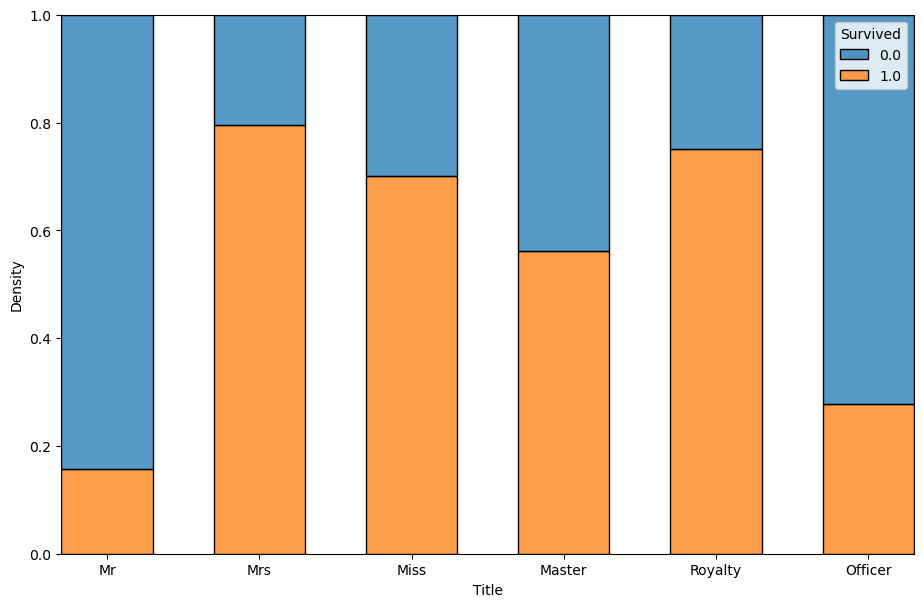

In [250]:
fig = plt.figure(figsize = (11, 7))

sns.histplot(
    data = mixdata,
    x = 'Title',
    hue = 'Survived',
    multiple = 'fill',
    stat = 'density',
    shrink = 0.6
)


女士和贵族存活率更高

### 查看家庭总数对存活率的影响

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_103392\3113782674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='FamilyNum', ylabel='Survived'>

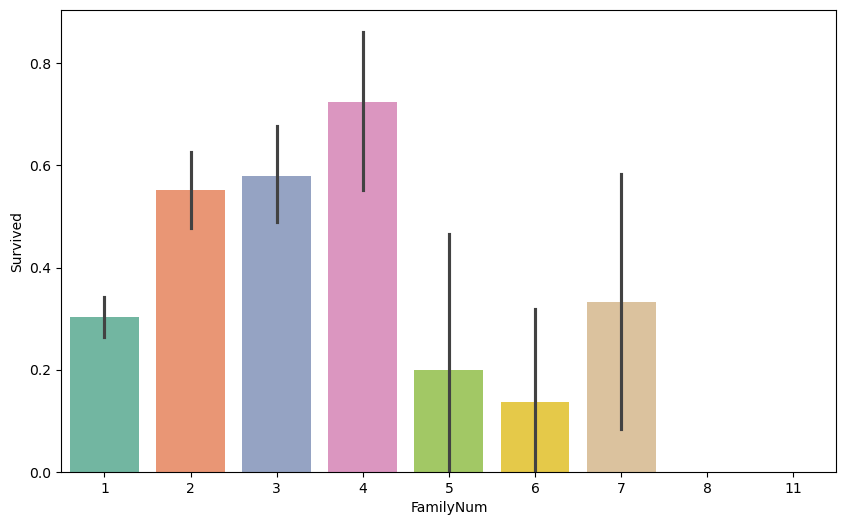

In [251]:
mixdata['FamilyNum'] = mixdata['SibSp'] + mixdata['Parch'] + 1

fig = plt.figure(figsize = (10, 6))

sns.barplot(
    data = mixdata,
    x = 'FamilyNum',
    y = 'Survived',
    palette = 'Set2'
)

家庭适中(2-4)时存活率高

In [252]:
#对家庭数量分类 1 -> 0, 2-4 -> 1, 其他 -> 2
def family_map(num):
    if num == 1:
        return 0
    elif num >= 2 and num <= 4:
        return 1
    else:
        return 2
mixdata['FamilySize'] = mixdata['FamilyNum'].apply(family_map)
mixdata['FamilySize'].value_counts()

FamilySize
0    790
1    437
2     82
Name: count, dtype: int64

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_103392\926534574.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='FamilySize', ylabel='Survived'>

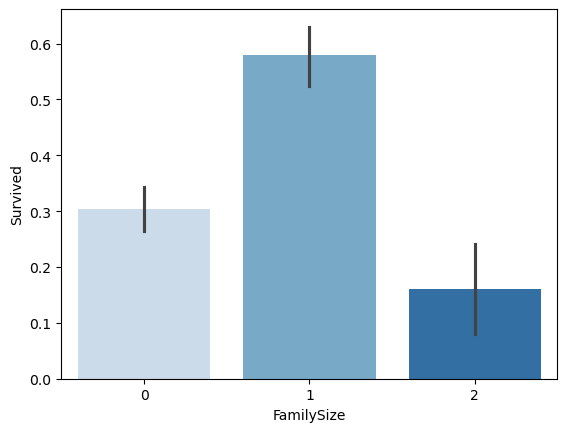

In [253]:
sns.barplot(
    data = mixdata,
    x = 'FamilySize',
    y = 'Survived',
    palette = 'Blues'
)

### 座位对存活率的影响 

Desk
U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_103392\3901244405.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\wxhlo\AppData\Local\Temp\ipykernel_103392\3901244405.py:6: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(


<Axes: xlabel='Desk', ylabel='Survived'>

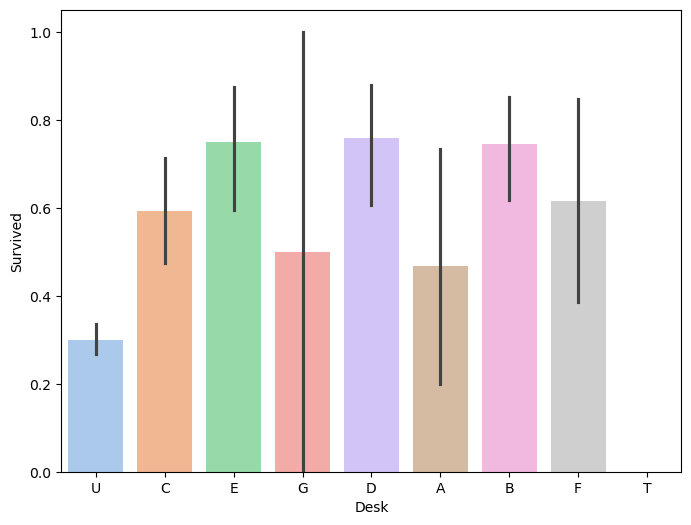

In [254]:
mixdata['Desk'] = mixdata['Cabin'].map(lambda x: x[0])
display(mixdata['Desk'].value_counts())

fig = plt.figure(figsize=(8, 6))

sns.barplot(
    x = 'Desk',
    y = 'Survived',
    data = mixdata,
    palette = sns.color_palette('pastel')
)

座位为E,D,B存活率较高

### 公号票的乘客数量对存活率的影响

In [255]:
Ticketcom = mixdata['Ticket'].value_counts()
Ticketcom.unique()

array([11,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_103392\3654498499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='TicketCom', ylabel='Survived'>

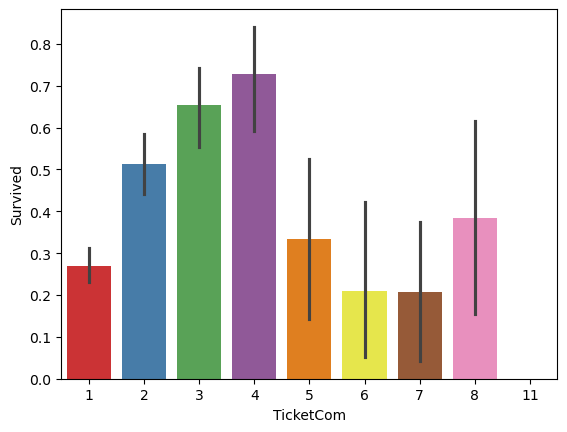

In [256]:
mixdata['TicketCom'] = mixdata['Ticket'].map(Ticketcom)
sns.barplot(
    data = mixdata,
    x = 'TicketCom',
    y = 'Survived',
    palette = 'Set1'
)

显然2-4人一起出来的生还率更高，1 or 5~以上的生还率都较低

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_103392\699280110.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='TicketGroup', ylabel='Survived'>

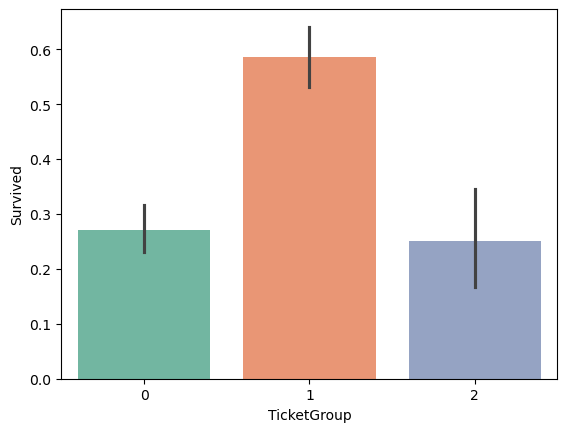

In [257]:
#对其分组，1 -> 0, 2-4 -> 1, 5~ -> 2
def ticket_classify(num):
    if num == 1:
        return 0
    elif num == 2 or num == 3 or num == 4:
        return 1
    else:
        return 2
mixdata['TicketGroup'] = mixdata['TicketCom'].apply(ticket_classify)
sns.barplot(
    data = mixdata,
    x = 'TicketGroup',
    y = 'Survived',
    palette = 'Set2'
)

### 年龄填充

In [258]:
mixdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilyNum    1309 non-null   int64  
 14  FamilySize   1309 non-null   int64  
 15  Desk         1309 non-null   object 
 16  TicketCom    1309 non-null   int64  
 17  TicketGroup  1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [259]:
mixdata_select = mixdata.select_dtypes(exclude = ['object'])
mixdata_select[mixdata_select['Age'].notnull()].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyNum,FamilySize,TicketCom,TicketGroup
PassengerId,1.000000,0.029340,-0.064097,0.028814,-0.050700,-0.021096,0.038722,-0.044024,-0.048093,-0.013838,-0.015947
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.342920,0.042787,0.106359,0.093239,0.160772
Pclass,-0.064097,-0.359653,1.000000,-0.408106,0.047221,0.017224,-0.741394,0.039602,-0.074864,-0.114293,-0.222827
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.194038,-0.240229,-0.174901,-0.185284,-0.136441
SibSp,-0.050700,-0.017358,0.047221,-0.243699,1.000000,0.374456,0.294004,0.844260,0.779310,0.621362,0.583489
Parch,-0.021096,0.093317,0.017224,-0.150917,0.374456,1.000000,0.318137,0.813080,0.705738,0.641500,0.577684
Fare,0.038722,0.342920,-0.741394,0.194038,0.294004,0.318137,1.000000,0.368463,0.451368,0.603769,0.677698
FamilyNum,-0.044024,0.042787,0.039602,-0.240229,0.844260,0.813080,0.368463,1.000000,0.897180,0.760887,0.700225
FamilySize,-0.048093,0.106359,-0.074864,-0.174901,0.779310,0.705738,0.451368,0.897180,1.000000,0.661291,0.737373
TicketCom,-0.013838,0.093239,-0.114293,-0.185284,0.621362,0.641500,0.603769,0.760887,0.661291,1.000000,0.898092


In [260]:
#提取与年龄相关性较强的字段
age_df = mixdata[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'FamilyNum', 'FamilySize', 'TicketGroup', 'TicketCom', 'Title']]

#对Title, one-hot编码
Pre_age_df = pd.get_dummies(age_df)
display(Pre_age_df.head())

age_corrdf = Pre_age_df.corr()
display(age_corrdf)
age_corrdf["Age"].sort_values(ascending = True) 

,Age,Pclass,SibSp,Parch,Fare,FamilyNum,FamilySize,TicketGroup,TicketCom,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,3,1,0,1.981001,2,1,0,1,False,False,True,False,False,False
1,38.0,1,1,0,4.266662,2,1,1,2,False,False,False,True,False,False
2,26.0,3,0,0,2.070022,1,0,0,1,False,True,False,False,False,False
3,35.0,1,1,0,3.972177,2,1,1,2,False,False,False,True,False,False
4,35.0,3,0,0,2.085672,1,0,0,1,False,False,True,False,False,False


,Age,Pclass,SibSp,Parch,Fare,FamilyNum,FamilySize,TicketGroup,TicketCom,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
Age,1.000000,-0.408106,-0.243699,-0.150917,0.194038,-0.240229,-0.174901,-0.136441,-0.185284,-0.385380,-0.282977,0.183965,0.215091,0.166771,0.057337
Pclass,-0.408106,1.000000,0.060832,0.018322,-0.694465,0.050027,-0.067487,-0.207236,-0.078554,0.088964,0.024487,0.121492,-0.179945,-0.137341,-0.095738
SibSp,-0.243699,0.060832,1.000000,0.373587,0.316025,0.861952,0.750411,0.578176,0.679444,0.324913,0.077564,-0.243104,0.061643,-0.013813,-0.005879
Parch,-0.150917,0.018322,0.373587,1.000000,0.327315,0.792296,0.687001,0.565073,0.647029,0.249930,0.066473,-0.304780,0.213491,-0.032631,-0.027555
Fare,0.194038,-0.694465,0.316025,0.327315,1.000000,0.386768,0.471864,0.671883,0.584846,0.066519,0.077920,-0.292138,0.238697,0.066869,0.069628
FamilyNum,-0.240229,0.050027,0.861952,0.792296,0.386768,1.000000,0.869082,0.689151,0.800556,0.350319,0.087350,-0.326487,0.157233,-0.026921,-0.018928
FamilySize,-0.174901,-0.067487,0.750411,0.687001,0.471864,0.869082,1.000000,0.746421,0.667312,0.326751,0.052191,-0.386111,0.288932,-0.024352,-0.005990
TicketGroup,-0.136441,-0.207236,0.578176,0.565073,0.671883,0.689151,0.746421,1.000000,0.877515,0.279087,0.091414,-0.363727,0.243580,-0.031809,0.004920
TicketCom,-0.185284,-0.078554,0.679444,0.647029,0.584846,0.800556,0.667312,0.877515,1.000000,0.300587,0.112016,-0.286860,0.105835,-0.037051,-0.003536
Title_Master,-0.385380,0.088964,0.324913,0.249930,0.066519,0.350319,0.326751,0.279087,0.300587,1.000000,-0.111542,-0.261121,-0.094692,-0.029820,-0.013807


Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
FamilyNum       -0.240229
TicketCom       -0.185284
FamilySize      -0.174901
Parch           -0.150917
TicketGroup     -0.136441
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Fare             0.194038
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [261]:
#数据建模 -> 随机森林等算法评估预测
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor


age_Know = Pre_age_df[Pre_age_df['Age'].notnull()]
age_Unknow = Pre_age_df[Pre_age_df['Age'].isnull()]

#训练数据
age_Know_X = age_Know.drop(columns = ['Age'])
age_Know_y = age_Know['Age']

#测试数据
age_Unknow_X = age_Unknow.drop(columns = ['Age'])

#训练模型
rfc = RandomForestRegressor(
    n_estimators = 500,
    max_features = 0.7,
    max_samples = 0.9, 
    criterion = 'friedman_mse',
    n_jobs = -1
)
rfc.fit(age_Know_X, age_Know_y)
display(rfc.score(age_Know_X, age_Know_y))

gbdt = GradientBoostingRegressor(
    n_estimators = 500,
    max_features = 0.8,
    learning_rate = 0.69,
    criterion = 'friedman_mse'
)
gbdt.fit(age_Know_X, age_Know_y)
display(gbdt.score(age_Know_X, age_Know_y))

etr = ExtraTreesRegressor(
    n_estimators = 200,
    max_features = 0.8,
    criterion = 'squared_error'
)
etr.fit(age_Know_X, age_Know_y)
etr.score(age_Know_X, age_Know_y)

0.7358314966874071

0.781374030773793

0.7862698542757997

In [262]:
#预测
age_Unknow_pred = etr.predict(age_Unknow_X)
age_Unknow_pred = age_Unknow_pred.round(1)
mixdata.loc[mixdata['Age'].isnull(), ['Age']] = age_Unknow_pred

In [263]:
#对异常值校正
display(mixdata[mixdata['Age'] < 1]['Age'].count())
mixdata.loc[mixdata['Age'] < 1, ['Age']] = 1
mixdata[mixdata['Age'] < 1]['Age'].count()

12

0

In [264]:
mixdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilyNum    1309 non-null   int64  
 14  FamilySize   1309 non-null   int64  
 15  Desk         1309 non-null   object 
 16  TicketCom    1309 non-null   int64  
 17  TicketGroup  1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

### 同组识别 

查看男性女性中同姓氏情况下是否存在同生共死

In [265]:
# mixdata['Surname'] = mixdata['Name'].map(lambda x: str(x).split(',')[0].strip())
# Surname_dict  = mixdata['Surname'].value_counts()


### 条件筛选 

In [267]:
mixdata_select = mixdata.select_dtypes(exclude=['object'])
mixdata_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   FamilyNum    1309 non-null   int64  
 8   FamilySize   1309 non-null   int64  
 9   TicketCom    1309 non-null   int64  
 10  TicketGroup  1309 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 112.6 KB


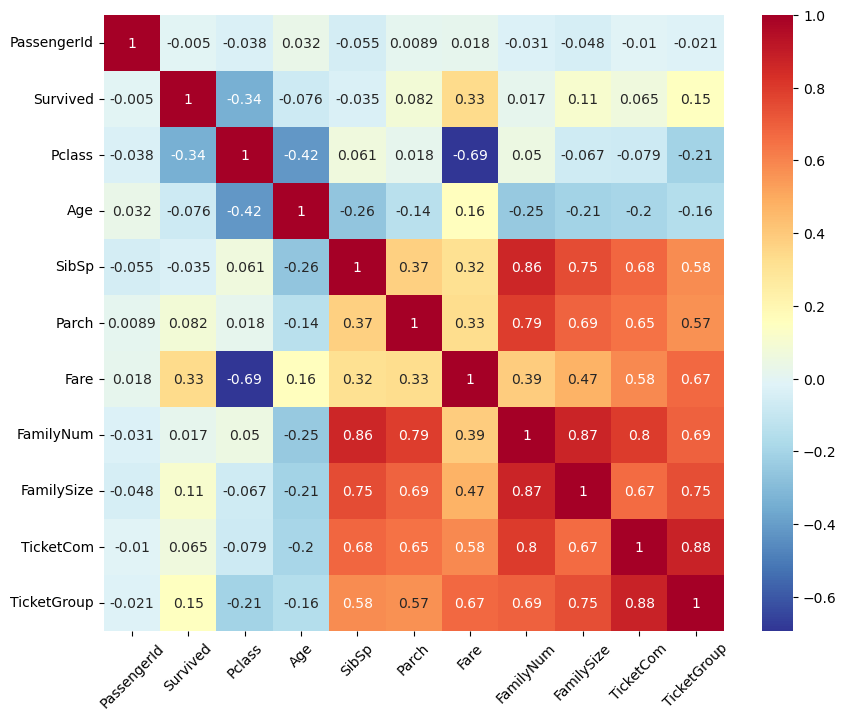

In [271]:
corr_df = mixdata_select.corr()

fig = plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_df,
    annot = True,
    cmap = 'RdYlBu_r'
)
_ = plt.xticks(rotation = 45)

In [272]:
#剔除相关性低的特征
mixdata_sel = mixdata.drop(
    columns = ['PassengerId', 'Age', 'SibSp', 'Parch', 'FamilyNum', 'TicketCom', 'Cabin', 'Name', 'Ticket']
)

#one-hot编码
mixdata_sel = pd.get_dummies(mixdata_sel)
mixdata_sel.head()

,Survived,Pclass,Fare,FamilySize,TicketGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Royalty,Desk_A,Desk_B,Desk_C,Desk_D,Desk_E,Desk_F,Desk_G,Desk_T,Desk_U
0,0.0,3,1.981001,1,0,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,4.266662,1,1,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1.0,3,2.070022,0,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1,3.972177,1,1,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0.0,3,2.085672,0,0,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


## 模型选择

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [278]:
#训练集与预测集
Train_data = mixdata_sel[mixdata_sel['Survived'].notnull()]
Test_data = mixdata_sel[mixdata_sel['Survived'].isnull()]

Train_data_x = Train_data.drop(columns = ['Survived'])
Train_data_y = Train_data['Survived']
Test_data_x = Test_data.drop(columns = ['Survived'])

#设置10折交叉验证
kFold = StratifiedKFold(n_splits = 10)

#模型选择
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(XGBClassifier())
classifiers.append(LinearDiscriminantAnalysis())

In [284]:
results = []
for classifier in classifiers:
    score = cross_val_score(classifier, Train_data_x, Train_data_y, cv = kFold, scoring = 'accuracy', n_jobs = -1)
    results.append(score)

res_mean = []
res_std = []
for res in results:
    res_mean.append(res.mean())
    res_std.append(res.std())

classifiers_names = [
    'LogisticRegression', 'DecisionTreeClassifier',
    'RandomForestClassifier', 'AdaBoostClassifier',
    'KNeighborsClassifier', 'SVC',
    'ExtraTreesClassifier', 'GradientBoostingClassifier',
    'XGBClassifier', 'LinearDiscriminantAnalysis'
]

res_df = pd.DataFrame(
    {
        'Classifier': classifiers_names,
        'Mean': res_mean,
        'Std': res_std
    }
)

res_df

,Classifier,Mean,Std
0,LogisticRegression,0.821561,0.034543
1,DecisionTreeClassifier,0.805843,0.024061
2,RandomForestClassifier,0.821561,0.031080
3,AdaBoostClassifier,0.818252,0.039696
4,KNeighborsClassifier,0.823795,0.039569
5,SVC,0.836130,0.035283
6,ExtraTreesClassifier,0.814831,0.028411
7,GradientBoostingClassifier,0.824944,0.039482
8,XGBClassifier,0.826092,0.036330
9,LinearDiscriminantAnalysis,0.827179,0.035143


C:\Users\wxhlo\AppData\Local\Temp\ipykernel_103392\745480509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


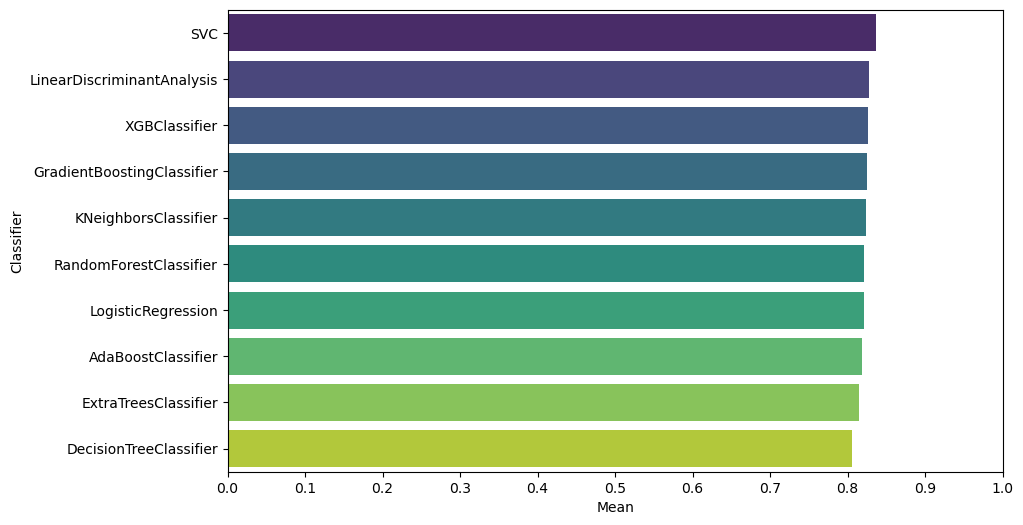

In [293]:
#可视化
import numpy as np
fig = plt.figure(figsize = (10, 6))

sns.barplot(
    res_df.sort_values(by = 'Mean', ascending = False),
    y = 'Classifier',
    x = 'Mean',
    palette = 'viridis'
)

plt.xlim([0, 1])
_ = plt.xticks(np.arange(0, 1.1, 0.1))

## 模型调优

In [295]:
#SVC
svc = SVC()
svc_params = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'sigmoid', 'poly'],
}
svc_gridcv = GridSearchCV(svc, svc_params, cv = kFold, scoring = 'accuracy', n_jobs = -1)
svc_gridcv.fit(Train_data_x, Train_data_y)
display(svc_gridcv.best_score_, svc_gridcv.best_params_)

0.8361298377028714

{'C': 1, 'kernel': 'rbf'}

In [298]:
#LDA
lda = LinearDiscriminantAnalysis()
lda_params = {
    'solver': ['svd', 'lsqr'],
    'tol' : [0.000001, 0.00001, 0.0001, 0.001, 0.01]
}
lda_gridcv = GridSearchCV(lda, lda_params, cv = kFold, scoring = 'accuracy', n_jobs = -1)
lda_gridcv.fit(Train_data_x, Train_data_y)
display(lda_gridcv.best_score_, lda_gridcv.best_params_)

0.8271785268414483

{'solver': 'svd', 'tol': 1e-06}

In [310]:
#xgboost
xgbc = XGBClassifier()
xgbc_params = {
    'n_estimators' : [500],
    'max_depth' : [3, 5, 7, 9, None],
    'learning_rate' : [0.0001, 0.001, 0.01],
    'subsample' : [0.7, 0.6, 0.8, 0.9],#每棵树随机样本数
    'objective' : ['binary:logistic'], #目标函数
    'eval_metric' : ['merror', 'mlogloss'], #验证集评判标准
    'min_child_weight' : [1,3,5,7], #最小叶子节点权重,越大越容易欠拟合,越小越容易过拟合
    'gamma' : [0], #惩罚项系数,指定节点分裂所需的最小损失函数下降值
}
xgbc_gridcv = GridSearchCV(xgbc, xgbc_params, cv = kFold, scoring = 'accuracy', n_jobs = -1)
xgbc_gridcv.fit(Train_data_x, Train_data_y)
display(xgbc_gridcv.best_score_, xgbc_gridcv.best_params_)

0.8339200998751561

{'eval_metric': 'merror',
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'binary:logistic',
 'subsample': 0.6}

In [314]:
#gbdt
gbdt = GradientBoostingClassifier()
gbdt_params = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : [0.001, 0.01, 0.1, 1],
    'n_estimators' : [100, 200, 300],
    'subsample' : [0.5, 0.7, 1.0],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_features' : [0.6, 0.7, 0.8, 0.9],
}
gbdt_gridcv = GridSearchCV(gbdt, gbdt_params, cv = kFold, scoring = 'accuracy', n_jobs = -1)
gbdt_gridcv.fit(Train_data_x, Train_data_y)
display(gbdt_gridcv.best_score_, gbdt_gridcv.best_params_)

0.8384269662921348

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_features': 0.9,
 'n_estimators': 100,
 'subsample': 0.7}

In [315]:
#knn
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance']
}
knn_gridcv = GridSearchCV(knn, knn_params, cv = kFold, scoring = 'accuracy', n_jobs = -1)
knn_gridcv.fit(Train_data_x, Train_data_y)
display(knn_gridcv.best_score_, knn_gridcv.best_params_)

0.8361797752808989

{'n_neighbors': 11, 'weights': 'uniform'}

## 模型评估 

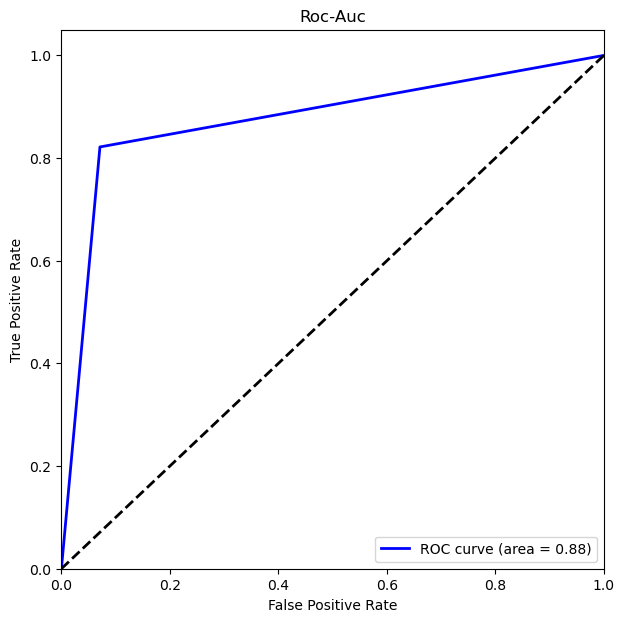

In [321]:
#roc-auc
from sklearn.metrics import roc_curve, auc

Train_data_pred = gbdt_gridcv.predict(Train_data_x)
#roc 计算假正率，计算真正率
fpr, tpr, thresholds = roc_curve(Train_data_y, Train_data_pred)
aucArea = auc(fpr, tpr)

#可视化roc-auc曲线
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(
    fpr, tpr,
    color = 'blue', 
    lw = 2, 
    label = 'ROC curve (area = %0.2f)' % aucArea
)
ax.plot(
    [0, 1], [0, 1],
    color = 'k',
    lw = 2,
    linestyle = '--'
)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Roc-Auc')
ax.legend(loc="lower right")

## 预测提交

In [323]:
mixdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilyNum    1309 non-null   int64  
 14  FamilySize   1309 non-null   int64  
 15  Desk         1309 non-null   object 
 16  TicketCom    1309 non-null   int64  
 17  TicketGroup  1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [326]:
Test_data_pred = gbdt_gridcv.predict(Test_data_x)

result_df = pd.DataFrame(
    {
        'PassengerId': test['PassengerId'],
        'Survived': Test_data_pred.astype(int)
    }
)

result_df.to_csv('./datasets/titanic/submission.csv', index = False)